# Subgroup A: Guest Journey Analysis and Segmentation

## What are the key factors influencing guest satisfaction throughout their journey?
- Analyse survey responses and operational data to identify the main drivers of satisfaction and dissatisfaction at each touchpoint.
- Propose metrics for tracking guest satisfaction over time.

## Business Context: USS

From a business perspective, USS (Universal Studios Singapore) aims to achieve two main objectives:

1. **Increase Revenue**: Revenue growth for USS is largely driven by factors such as ticket sales, merchandise purchases, food and beverage sales, and the use of services like Express Passes. By improving guest satisfaction at key touchpoints (e.g., attraction experiences, food quality, overall park services), USS can increase customer spending and upsell services.

2. **Increase Footfall**: Another crucial objective is increasing the number of visitors to the park. Satisfied guests are more likely to recommend the park to others, leave positive reviews, and return in the future, all of which can drive higher footfall. Enhancing experiences in areas like food variety, ride satisfaction, and overall park cleanliness can encourage more guests to visit and come back.

### Why These Factors Matter:
- By focusing on **Revenue** and **Footfall**, we align our analysis with USS's core business goals. Tracking guest satisfaction and its impact on these metrics will help USS prioritise improvements in areas that directly influence guest spending and repeat visits.
- Our scoring model reflects these business objectives by calculating scores related to **Revenue** and **Visitor Footfall**, allowing USS to measure how well different aspects of the guest experience align with their goals.


In [594]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [595]:
#Load in Datasets
correlationplot = pd.read_csv("C:/Users/User/Documents/AAAA NUS Y4S1/DSA3101/survey_data_17features.csv")

In [596]:
correlationplot.head()

,gender,occupation,visitor_profile,ticket_purchase_method,ticket_type,special_event_ticket,visitor_type,attraction_overall_experience,overall_staff_service,overall_satisfaction,return_likelihood,weighted_food_shopping_satisfaction_score,total_spend,weighted_amenities_satisfaction_score,weighted_entry_experience_score,thrill_seeker_level,age_group
0,Male,Student,Singaporean,"Third Party Vendor (e.g. Klook, Trip.com)",Regular ticket with Express Pass,No,Group,0.50,0.75,0.75,0.5,0.420844,1.0,0.795264,0.550677,1.0,Young Adults
1,Female,Employed,Singaporean,Resort World Sentosa Website,One-day regular ticket,No,Group,1.00,1.00,1.00,1.0,0.571141,0.0,1.000000,0.776780,1.0,Young Adults
2,Female,Student,Singaporean,"Third Party Vendor (e.g. Klook, Trip.com)",One-day regular ticket,No,Group,1.00,0.50,0.75,1.0,0.685033,1.0,0.310502,1.000000,0.5,Young Adults
3,Male,Student,Singaporean,"Third Party Vendor (e.g. Klook, Trip.com)",One-day regular ticket,Yes,Group,0.75,0.75,0.75,1.0,0.420844,0.0,0.795264,0.578543,1.0,Young Adults
4,Male,Student,Singaporean,Resort World Sentosa Website,One-day regular ticket,No,Group,0.75,0.75,0.50,0.5,0.429581,0.0,0.614207,0.817931,0.5,Young Adults


### Correlation Table

All Correlations with Overall Satisfaction:
overall_satisfaction                         1.000000
overall_staff_service                        0.767905
weighted_food_shopping_satisfaction_score    0.746331
weighted_amenities_satisfaction_score        0.727643
weighted_entry_experience_score              0.700137
attraction_overall_experience                0.590987
thrill_seeker_level                          0.438060
return_likelihood                            0.430587
total_spend                                  0.311509
Name: overall_satisfaction, dtype: float64


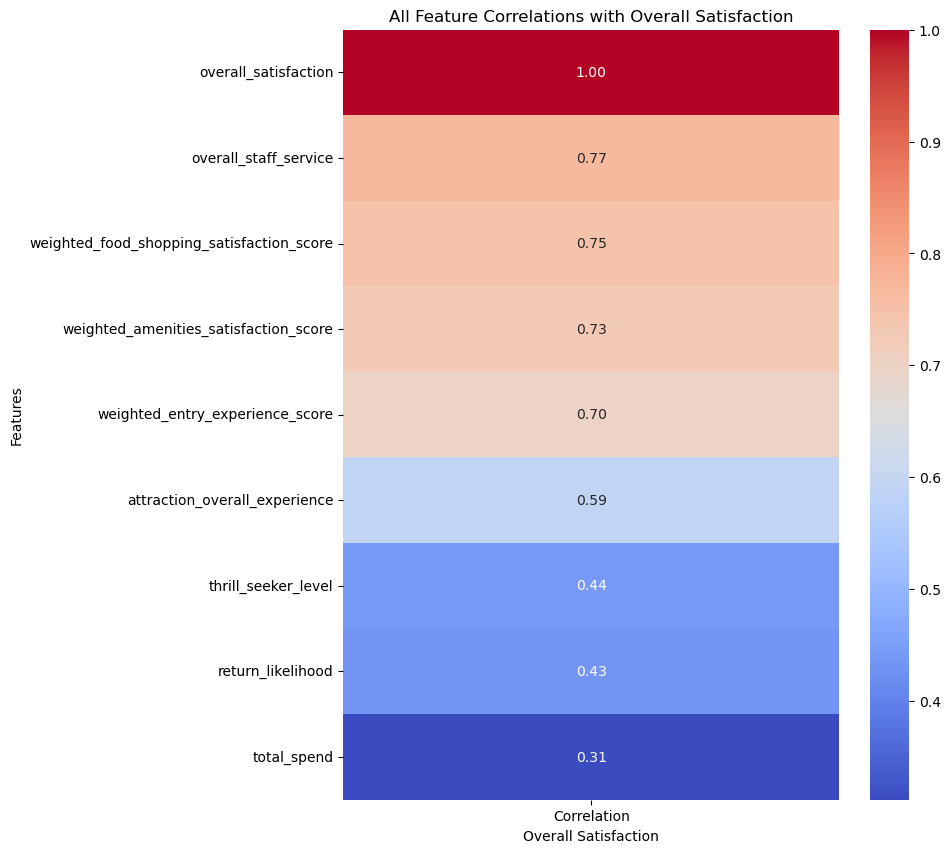

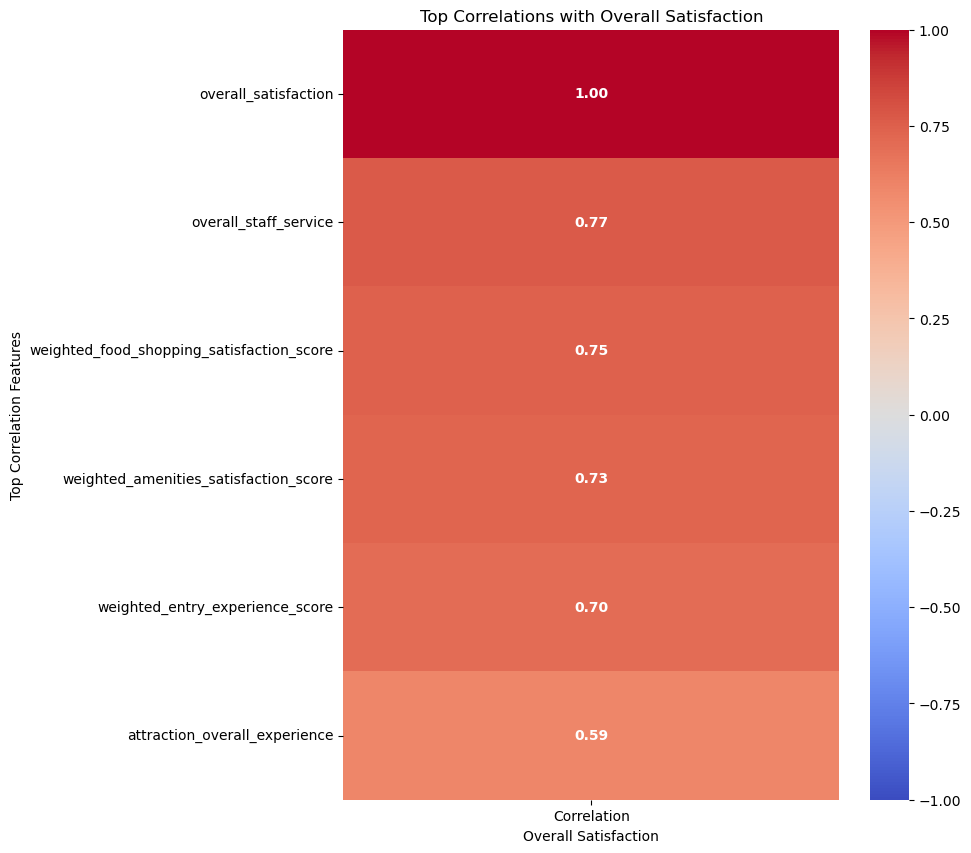

In [598]:
# Correlation Analysis
# Select only numeric features for correlation calculation
numeric_data = correlationplot.select_dtypes(include=[np.number])

# Calculate correlations with overall_satisfaction
correlations = numeric_data.corr()
satisfaction_corr = correlations['overall_satisfaction'].abs().sort_values(ascending=False)

# Print all correlations with overall_satisfaction
print("All Correlations with Overall Satisfaction:")
print(satisfaction_corr)

# Filter for features with high correlation (threshold > 0.5)
top_features = satisfaction_corr[satisfaction_corr > 0.5].index.tolist()

# Create DataFrame for top correlations
overall_satisfaction_corr_df = satisfaction_corr[top_features].to_frame(name='Correlation').sort_values(by="Correlation", ascending=False)

# Plot all correlations as a heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(
    satisfaction_corr.to_frame(name='Correlation'),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar=True
)
plt.title("All Feature Correlations with Overall Satisfaction")
plt.xlabel("Overall Satisfaction")
plt.ylabel("Features")
plt.show()

# Plot top correlations as a heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(
    overall_satisfaction_corr_df,
    annot=True,
    annot_kws={"weight": "bold"},  
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cbar=True
)
plt.title("Top Correlations with Overall Satisfaction")
plt.xlabel("Overall Satisfaction")
plt.ylabel("Top Correlation Features")
plt.show()

## Analysis of Main Satisfaction and Dissatisfaction 

Based on the correlation table, the following factors were found to have the strongest relationships with overall guest satisfaction:

1. **Staff Service**: This has the highest correlation, suggesting that guest interactions with staff are critical to a positive experience. Improvements in staff service could significantly increase satisfaction levels.
2. **Food and Shopping**: Guests value high-quality food and shopping experiences. By offering diverse, high-quality food options and improving the shopping experience (e.g. merchandise), USS can increase guest satisfaction and drive higher spend.
3. **Amenities**: Clean and accessible amenities (restrooms, seating, etc.) are essential for guest comfort. Ensuring that these facilities are well-maintained and conveniently located will enhance the overall experience.
4. **Entry Experience**: A smooth, efficient, and welcoming entry process is key to setting a positive tone for the day. Streamlining entry points and ensuring staff are welcoming can improve first impressions and reduce stress at the start of the visit.
5. **Attraction Experience**: The quality of the attractions and how well they meet guest expectations is another key driver of satisfaction. Visitors who enjoy the attractions are more likely to report higher satisfaction.

## Score Calculation: From USS's Business Perspective
To track guest satisfaction over time and align with USS's business objectives (increasing revenue and footfall), we can define four key metrics based on the drivers of satisfaction identified in your analysis. These metrics should reflect the quality of the guest experience.

| **Metric**               | **Description**                                                                                                                                                        | **Correlation Information**                                                                                                                                       | **Business Impact**                                                                                                                                                  | **Weightage** |
|--------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------|
| **Service Satisfaction**  | Measures guest satisfaction with staff interactions (friendliness, professionalism, helpfulness).                                                                      | **Overall Staff Service** has the highest positive correlation with **Overall Satisfaction**.                                           | Excellent service drives positive guest experiences, higher likelihood of return, and positive word-of-mouth, increasing footfall and repeat visits.                    | **30%**       |
| **Food & Shopping Satisfaction** | Measures guest satisfaction with food quality, variety, pricing, and the shopping experience (merchandise variety, pricing).                                             | **Food & Shopping Satisfaction** positively correlates with overall satisfaction, though not as strongly as serivce satisfaction.                                | Satisfied guests are more likely to spend on food and merchandise, increasing per capita revenue.          | **30%**       |
| **Visitor Experience**    | Measures satisfaction with entry processes and the quality of park amenities and cleanliness.                                                          | **Entry Experience** and **Amenities Satisfaction** have strong correlations with **Overall Satisfaction**. Both are key drivers of a positive first impression.      | Key first impressions and overall satisfaction with the attractions lead to repeat visits, extended time in the park, and direct impact on revenue generation.          | **25%**       |
| **Attraction Experience**  | Tracks satisfaction with the variety, quality, and thrill of attractions.                                                                  | **Attraction Overall Experience** is positively correlated with **Overall Satisfaction**. Thrill-seeker level also impacts attraction enjoyment and satisfaction.        | While attractions are the core of the park experience, the correlation with overall satisfaction is secondary to park quality and service. That being said, enjoyable attractions with minimal wait times still enhance guest satisfaction, encourage return likelihood and social sharing, boosting footfall. | **15%**       |


In [602]:
# Metric Score Calculation

# Visitor experience - Amenities and Entry Experience
correlationplot['visitor_experience'] = (correlationplot['weighted_amenities_satisfaction_score'] * 0.50) + (correlationplot['weighted_entry_experience_score'] * 0.50)


# Calculate the overall score based on weightage
correlationplot['overall_satisfaction_score'] = (
    (correlationplot['overall_staff_service'] * 0.30) + 
    (correlationplot['weighted_food_shopping_satisfaction_score'] * 0.30) + 
    (correlationplot['visitor_experience'] * 0.25) + 
    (correlationplot['attraction_overall_experience'] * 0.15)
)

average_overall_score = correlationplot['overall_satisfaction_score'].mean()

print(f"Average Overall Score: {average_overall_score}")


Average Overall Score: 0.6239749074284524


The proposed metrics for tracking guest satisfaction are directly aligned with USS's core business goals of increasing **Revenue** and **Footfall**. USS can prioritise enhancements in areas that directly influence customer spending and repeat visits. Improved guest satisfaction in these areas not only increases the likelihood of return visits but also boosts word-of-mouth recommendations, helping to attract new visitors and drive higher footfall. Ultimately, this data-driven approach enables USS to optimise the guest experience, leading to sustained revenue growth and greater park attendance.